In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as NN
import torch.nn.functional as funct
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import pickle

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Data_Q3/largeTrain.csv",header=None)
test = pd.read_csv("/content/drive/MyDrive/Data_Q3/largeValidation.csv",header=None)
print(train.shape)

(9000, 129)


In [ ]:
train_X = torch.from_numpy(train[train.columns[1:]].to_numpy().astype('float32'))
train_Y = torch.from_numpy(train[train.columns[:1]].to_numpy())
test_X = torch.from_numpy(test[test.columns[1:]].to_numpy().astype('float32'))
test_Y = torch.from_numpy(test[test.columns[:1]].to_numpy())
train_Y.T[0]

tensor([6, 6, 0,  ..., 8, 1, 5])

In [ ]:
class Nueral_Net(NN.Module):
    def __init__(self,hidden_unit):
        super().__init__()
        self.layer_1 = NN.Linear(128, hidden_unit)
        torch.nn.init.uniform_(self.layer_1.weight, a=0.0, b=1.0)
        torch.nn.init.uniform_(self.layer_1.bias, a=0.0, b=1.0)
        self.layer_3 = NN.Linear(hidden_unit, 10)
        torch.nn.init.uniform_(self.layer_3.weight, a=0.0, b=1.0)
        torch.nn.init.uniform_(self.layer_3.bias, a=0.0, b=1.0)
    def forward(self, x):
        x = funct.relu(self.layer_1(x))
        x = self.layer_3(x)
        return x


In [ ]:
hidden_units = [5,20,50,100,200]
learning_rates = [0.1,0.01,0.001]

Streaming output truncated to the last 5000 lines.
        [21.7808, 22.3766, 23.1027,  ..., 22.9523, 21.5173, 22.1939]],
       grad_fn=<AddmmBackward>)
tensor(2.5983, grad_fn=<NllLossBackward>)
tensor([[29.1914, 29.1131, 29.2568,  ..., 30.4307, 29.0032, 29.0599],
        [38.4394, 38.9865, 38.5662,  ..., 39.7813, 38.6039, 38.5481],
        [29.5349, 27.8105, 28.0699,  ..., 30.0713, 28.6352, 28.7104],
        ...,
        [31.5483, 31.9929, 30.9028,  ..., 32.8496, 32.9173, 31.7536],
        [43.1268, 42.9729, 42.5246,  ..., 43.4909, 41.6516, 42.2053],
        [21.7942, 22.5469, 23.0060,  ..., 22.7324, 21.3608, 21.9595]],
       grad_fn=<AddmmBackward>)
tensor(2.4922, grad_fn=<NllLossBackward>)
tensor([[29.1798, 29.3343, 29.1430,  ..., 30.0363, 28.7906, 28.7729],
        [38.3988, 39.2789, 38.4422,  ..., 39.2438, 38.2933, 38.1691],
        [29.5582, 28.0065, 27.9687,  ..., 29.7219, 28.4200, 28.4444],
        ...,
        [31.5295, 32.2074, 30.7707,  ..., 32.4019, 32.6664, 31.4376],
   

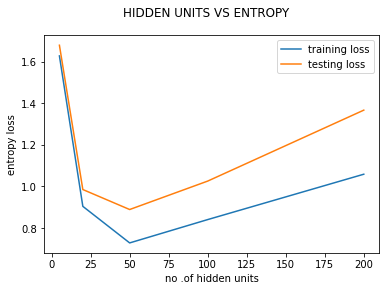

In [ ]:
g_train = []
g_test = []
for h_U in hidden_units:
  nn_torch = Nueral_Net(h_U)
  print(nn_torch)
  loss_function = NN.CrossEntropyLoss()
  optimizer = optim.Adam(nn_torch.parameters(), lr=0.01)
  epocs =100
  train_loss = []
  val_loss =[]
  for i in range(epocs): 
      X = train_X
      y= train_Y 
      nn_torch.zero_grad() 
      output = nn_torch(X)
      val_output = nn_torch(test_X)
      print(output)  
      loss = loss_function(output, y.T[0]) 
      loss_val = loss_function(val_output,test_Y.T[0])
      loss.backward() 
      optimizer.step()
      print(loss)
      train_loss.append(loss)
      val_loss.append(loss_val)
  g_train.append(train_loss[-1])
  g_test.append(val_loss[-1])
plt.plot(hidden_units,g_train,label = 'training loss')
plt.plot(hidden_units,g_test, label = 'testing loss')
plt.xlabel('no .of hidden units')
plt.ylabel('entropy loss')
plt.legend()
plt.title('HIDDEN UNITS VS ENTROPY')
plt.show()

Nueral_Net(
  (layer_1): Linear(in_features=128, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=10, bias=True)
)
tensor([[19.1705, 17.0764, 42.8207,  ..., 28.8362, 31.0614,  7.7259],
        [24.5388, 22.6950, 55.6672,  ..., 37.6708, 40.8660,  9.8299],
        [20.3564, 16.4470, 43.6254,  ..., 30.8865, 30.7117,  8.1325],
        ...,
        [21.4465, 18.1503, 46.7761,  ..., 32.2935, 33.4234,  8.4501],
        [27.6033, 23.3766, 60.8467,  ..., 42.5498, 43.5662, 11.1574],
        [13.9542, 11.3517, 30.0701,  ..., 20.8428, 21.1609,  5.8346]],
       grad_fn=<AddmmBackward>)
tensor(15.2470, grad_fn=<NllLossBackward>)
tensor([[19.2383, 17.9790, 29.3366,  ..., 27.0143, 28.8802, 10.6219],
        [25.1977, 24.3656, 39.0253,  ..., 36.5004, 38.8880, 14.0343],
        [20.9553, 17.8064, 30.6644,  ..., 29.5293, 29.2167, 11.2476],
        ...,
        [21.7566, 19.3413, 32.4532,  ..., 30.8528, 31.4068, 11.8073],
        [28.1244, 25.0191, 42.1713,  ..., 40.3146, 41.023

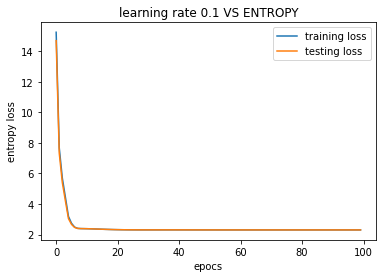

Nueral_Net(
  (layer_1): Linear(in_features=128, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=10, bias=True)
)
tensor([[44.5537, 25.1357, 38.9383,  ..., 20.3170, 27.3322, 26.1679],
        [57.1229, 30.8432, 50.1750,  ..., 26.1012, 33.5486, 34.0168],
        [42.1569, 23.0699, 37.2316,  ..., 19.0375, 25.2181, 24.7467],
        ...,
        [47.9054, 27.1543, 41.6563,  ..., 20.3899, 30.6063, 27.5511],
        [60.9862, 33.7787, 53.2951,  ..., 25.9954, 37.7910, 34.6708],
        [29.2797, 16.7344, 25.7467,  ..., 12.8778, 18.7191, 17.2056]],
       grad_fn=<AddmmBackward>)
tensor(14.0882, grad_fn=<NllLossBackward>)
tensor([[43.1128, 25.2553, 38.7764,  ..., 20.4983, 27.4249, 26.2454],
        [55.3161, 31.0302, 50.0149,  ..., 26.3606, 33.7042, 34.1496],
        [40.9123, 23.2666, 37.1756,  ..., 19.2363, 25.4137, 24.8702],
        ...,
        [46.3629, 27.2808, 41.4826,  ..., 20.5847, 30.7031, 27.6344],
        [59.0557, 33.9475, 53.0886,  ..., 26.2464, 37.924

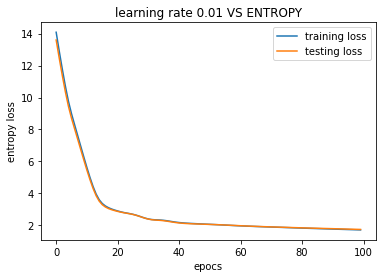

Nueral_Net(
  (layer_1): Linear(in_features=128, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=10, bias=True)
)
tensor([[31.9946, 26.3634, 19.9037,  ..., 30.9058, 31.4324, 27.7071],
        [39.3037, 33.9965, 25.3177,  ..., 38.3640, 38.9125, 34.8582],
        [26.2201, 21.9878, 17.0530,  ..., 25.8620, 25.9914, 22.5966],
        ...,
        [34.0316, 31.1282, 22.7943,  ..., 33.5677, 34.1280, 31.3289],
        [41.8909, 36.4383, 27.1782,  ..., 41.6963, 41.7858, 37.2217],
        [21.8445, 17.0638, 13.2499,  ..., 20.6075, 21.2185, 18.3860]],
       grad_fn=<AddmmBackward>)
tensor(18.5908, grad_fn=<NllLossBackward>)
tensor([[31.9977, 26.3845, 19.9294,  ..., 30.9151, 31.4406, 27.7268],
        [39.3095, 34.0255, 25.3514,  ..., 38.3780, 38.9249, 34.8854],
        [26.2166, 21.9966, 17.0704,  ..., 25.8618, 25.9907, 22.6042],
        ...,
        [34.0321, 31.1415, 22.8197,  ..., 33.5710, 34.1309, 31.3408],
        [41.8927, 36.4591, 27.2106,  ..., 41.7034, 41.792

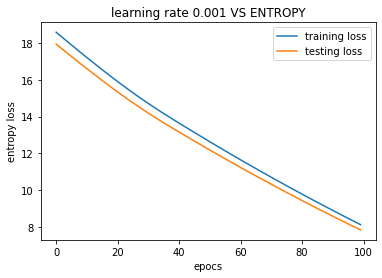

In [ ]:
g_train = []
g_test = []
for lrtes in learning_rates:
  nn_torch = Nueral_Net(4)
  print(nn_torch)
  loss_function = NN.CrossEntropyLoss()
  optimizer = optim.Adam(nn_torch.parameters(), lr=lrtes)
  epocs =100
  train_loss = []
  val_loss =[]
  for i in range(epocs): 
      X = train_X
      y= train_Y 
      nn_torch.zero_grad() 
      output = nn_torch(X)
      val_output = nn_torch(test_X)
      print(output)  
      loss = loss_function(output, y.T[0]) 
      loss_val = loss_function(val_output,test_Y.T[0])
      loss.backward() 
      optimizer.step()
      print(loss)
      train_loss.append(loss)
      val_loss.append(loss_val)
  plt.plot(train_loss,label = 'training loss')
  plt.plot(val_loss, label = 'testing loss')
  plt.xlabel('epocs')
  plt.ylabel('entropy loss')
  plt.legend()
  plt.title('learning rate '+ str(lrtes)+' VS ENTROPY')
  plt.show()